In [1]:
# %pip install lsdb huggingface-hub

In [2]:
%%time

import lsdb

region = lsdb.ConeSearch(ra=1.0, dec=-1.0, radius_arcsec=900.0)

zcat = lsdb.open_catalog(
    'hf://datasets/LSDB/desi-dr1-zcat',
    columns=['Z'],
    search_filter=region,
)
gaia = lsdb.open_catalog(
    's3://stpubdata/gaia/gaia_dr3/public/hats',
    columns=['phot_rp_mean_mag', 'phot_bp_mean_mag'],
    search_filter=region,
)
match = zcat.crossmatch(gaia, suffix_method='overlapping_columns').compute()
match

/Users/hombit/.virtualenvs/lsdb-release/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/hombit/.virtualenvs/lsdb-release/lib/python3.13/site-packages/upath/core.py:170: UserWarning: UPath 'hf' filesystem not explicitly implemented. Falling back to default implementation. This filesystem may not be tested.
  upath_cls = get_upath_class(protocol=pth_protocol)


CPU times: user 6.9 s, sys: 1.94 s, total: 8.84 s
Wall time: 18.7 s


,Z,TARGET_RA,TARGET_DEC,phot_rp_mean_mag,phot_bp_mean_mag,ra,dec,_dist_arcsec
_healpix_29,,,,,,,,
1224789837073574792,0.249567,1.07207,-1.223825,18.412693,20.14949,1.072067,-1.223824,0.014088
1224792918551504252,0.182735,1.064407,-1.18964,17.7271,19.463089,1.064406,-1.189643,0.011815
...,...,...,...,...,...,...,...,...
1272867652138583504,-0.000345,0.979837,-0.753824,17.399115,18.056866,0.979838,-0.753825,0.006124
1272867783258140856,0.22604,0.931005,-0.77565,19.147228,20.648594,0.931004,-0.775651,0.005331


Text(0, 0.5, 'Gaia DR3 $BP-RP$ color')

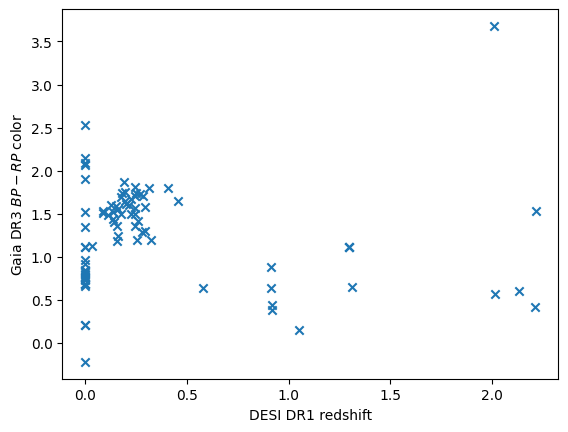

In [3]:
import matplotlib.pyplot as plt
plt.scatter(match['Z'], match['phot_bp_mean_mag'] - match['phot_rp_mean_mag'], marker='x')
plt.xlabel('DESI DR1 redshift')
plt.ylabel('Gaia DR3 $BP-RP$ color')